In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing


In [51]:
# load dataset:
data = pd.read_csv(r'E:\ExcelR ass\Decision_tree_ass\Company_Data.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [121]:
# Using 3 Category :
# split data :
import numpy as np
data_dummy = pd.get_dummies(data)
data_dummy["sales_nature"] = pd.cut(data["Sales"], bins = [-1,5.4,7.5,16.27], labels = ["Bad", "Moderate", "Good"])
x = data_dummy.iloc[:,1:15]
y = data_dummy.iloc[:,-1]
# data.head()
# data.shape    # (400, 21)
# print(y.isnull().sum())
# data_dummy.head()
# data_dummy.shape   # (400, 16)
data_dummy["sales_nature"] = data_dummy["sales_nature"].replace(np.NaN, 0)
# data_dummy["sales_nature"] = data_dummy["sales_nature"].fillna("Moderate")
data_dummy.isnull().sum()


Sales               0
CompPrice           0
Income              0
Advertising         0
Population          0
Price               0
Age                 0
Education           0
ShelveLoc_Bad       0
ShelveLoc_Good      0
ShelveLoc_Medium    0
Urban_No            0
Urban_Yes           0
US_No               0
US_Yes              0
sales_nature        0
dtype: int64

In [147]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=7)
# C5.0 :
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

array(['Moderate', 'Good', 'Moderate', 'Good', 'Moderate', 'Good',
       'Moderate', 'Moderate', 'Bad', 'Moderate', 'Good', 'Moderate',
       'Good', 'Good', 'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Good',
       'Good', 'Good', 'Good', 'Moderate', 'Good', 'Bad', 'Good',
       'Moderate', 'Moderate', 'Good', 'Bad', 'Good', 'Good', 'Good',
       'Moderate', 'Good', 'Bad', 'Good', 'Moderate', 'Moderate', 'Bad',
       'Good', 'Bad', 'Good', 'Good', 'Good', 'Bad', 'Good', 'Bad',
       'Moderate', 'Moderate', 'Moderate', 'Good', 'Moderate', 'Bad',
       'Bad', 'Moderate', 'Good', 'Moderate', 'Good', 'Bad', 'Good',
       'Good', 'Good', 'Moderate', 'Good', 'Moderate', 'Good', 'Bad',
       'Good', 'Moderate', 'Good', 'Good', 'Good', 'Good', 'Moderate',
       'Moderate', 'Bad', 'Good', 'Moderate'], dtype=object)

In [148]:
pd.Series(y_pred).value_counts()

Good        39
Moderate    25
Bad         16
dtype: int64

In [149]:
np.mean(y_test == y_pred)  # using 3 category we get only 53.75 % accuracy

0.6625

In [150]:
# Using 2 Categories :
# split data :
import numpy as np
data_dummy_2 = pd.get_dummies(data)
data_dummy_2["sales_nature"] = pd.cut(data["Sales"], bins = [-1,7.5,16.27], labels = ["Risky", "Good"])
new_x = data_dummy_2.iloc[:,1:15]
new_y = data_dummy_2.iloc[:,-1]
# data.head()
# data.shape    # (400, 21)
# print(new_y.isnull().sum())
# data_dummy_2.head()
# data_dummy_2.shape   # (400, 16)
data_dummy_2["sales_nature"] = data_dummy_2["sales_nature"].replace(np.NaN, 0)
# data_dummy["sales_nature"] = data_dummy["sales_nature"].fillna("Moderate")
data_dummy_2.isnull().sum()
new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_x,new_y,test_size=0.2,random_state=7)
# C5.0 :
new_model = DecisionTreeClassifier(criterion='entropy')
new_model.fit(new_x_train, new_y_train)
new_y_pred = new_model.predict(new_x_test)
new_y_pred

array(['Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Risky', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Risky', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Risky', 'Good', 'Good'], dtype=object)

In [151]:
np.mean(new_y_pred == new_y_test)    # using 2 category we got 73.75 % accurecy

0.7375

In [152]:
# using GINI impurity :
new_model = DecisionTreeClassifier(criterion='gini')
new_model.fit(new_x_train, new_y_train)
new_y_pred = new_model.predict(new_x_test)
np.mean(new_y_pred == new_y_test)  # 63.75 % 

0.6375

[Text(558.0, 475.65000000000003, 'X[8] <= 0.5\ngini = 0.5\nsamples = 320\nvalue = [159, 161]'),
 Text(279.0, 339.75, 'X[4] <= 105.5\ngini = 0.477\nsamples = 245\nvalue = [96, 149]'),
 Text(139.5, 203.85000000000002, 'X[5] <= 64.5\ngini = 0.43\nsamples = 83\nvalue = [57, 26]'),
 Text(69.75, 67.94999999999999, 'gini = 0.252\nsamples = 54\nvalue = [46, 8]'),
 Text(209.25, 67.94999999999999, 'gini = 0.471\nsamples = 29\nvalue = [11, 18]'),
 Text(418.5, 203.85000000000002, 'X[2] <= 10.5\ngini = 0.366\nsamples = 162\nvalue = [39, 123]'),
 Text(348.75, 67.94999999999999, 'gini = 0.256\nsamples = 113\nvalue = [17, 96]'),
 Text(488.25, 67.94999999999999, 'gini = 0.495\nsamples = 49\nvalue = [22, 27]'),
 Text(837.0, 339.75, 'X[4] <= 135.0\ngini = 0.269\nsamples = 75\nvalue = [63, 12]'),
 Text(697.5, 203.85000000000002, 'X[0] <= 98.0\ngini = 0.065\nsamples = 59\nvalue = [57, 2]'),
 Text(627.75, 67.94999999999999, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(767.25, 67.94999999999999, 'gini

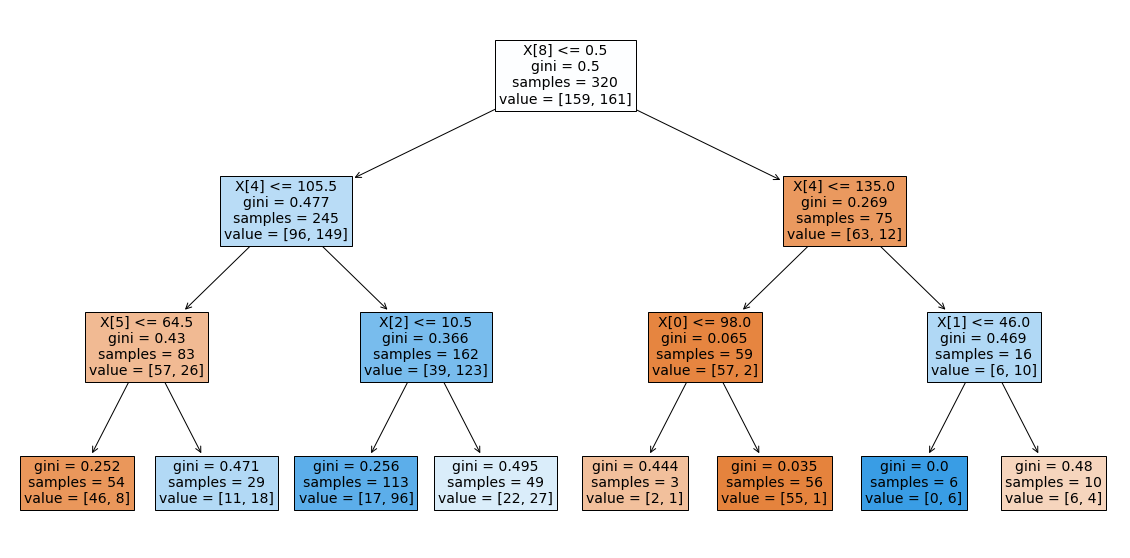

In [157]:
# Visulization :
import matplotlib.pyplot as plt
%matplotlib inline
model = DecisionTreeClassifier(max_depth=3,min_samples_leaf=3)
model.fit(new_x_train, new_y_train)
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, fontsize=14)

[Text(558.0, 475.65000000000003, 'X[8] <= 0.5\ngini = 0.5\nsamples = 320\nvalue = [159, 161]'),
 Text(279.0, 339.75, 'X[4] <= 105.5\ngini = 0.477\nsamples = 245\nvalue = [96, 149]'),
 Text(139.5, 203.85000000000002, 'X[5] <= 64.5\ngini = 0.43\nsamples = 83\nvalue = [57, 26]'),
 Text(69.75, 67.94999999999999, 'gini = 0.252\nsamples = 54\nvalue = [46, 8]'),
 Text(209.25, 67.94999999999999, 'gini = 0.471\nsamples = 29\nvalue = [11, 18]'),
 Text(418.5, 203.85000000000002, 'X[2] <= 10.5\ngini = 0.366\nsamples = 162\nvalue = [39, 123]'),
 Text(348.75, 67.94999999999999, 'gini = 0.256\nsamples = 113\nvalue = [17, 96]'),
 Text(488.25, 67.94999999999999, 'gini = 0.495\nsamples = 49\nvalue = [22, 27]'),
 Text(837.0, 339.75, 'X[4] <= 135.0\ngini = 0.269\nsamples = 75\nvalue = [63, 12]'),
 Text(697.5, 203.85000000000002, 'X[0] <= 98.0\ngini = 0.065\nsamples = 59\nvalue = [57, 2]'),
 Text(627.75, 67.94999999999999, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(767.25, 67.94999999999999, 'gini

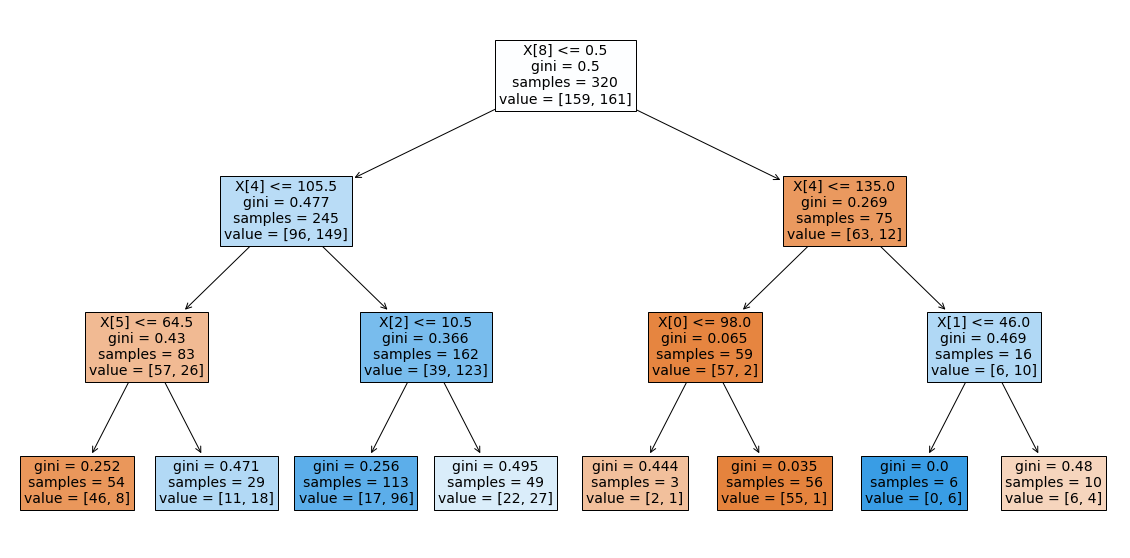

In [158]:
# Visulization :
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, fontsize=14)

[Text(620.0, 475.65000000000003, 'X[8] <= 0.5\ngini = 0.5\nsamples = 320\nvalue = [159, 161]'),
 Text(372.0, 339.75, 'X[4] <= 105.5\ngini = 0.477\nsamples = 245\nvalue = [96, 149]'),
 Text(248.0, 203.85000000000002, 'X[5] <= 64.5\ngini = 0.43\nsamples = 83\nvalue = [57, 26]'),
 Text(124.0, 67.94999999999999, 'gini = 0.252\nsamples = 54\nvalue = [46, 8]'),
 Text(372.0, 67.94999999999999, 'gini = 0.471\nsamples = 29\nvalue = [11, 18]'),
 Text(496.0, 203.85000000000002, 'gini = 0.366\nsamples = 162\nvalue = [39, 123]'),
 Text(868.0, 339.75, 'X[4] <= 135.0\ngini = 0.269\nsamples = 75\nvalue = [63, 12]'),
 Text(744.0, 203.85000000000002, 'gini = 0.065\nsamples = 59\nvalue = [57, 2]'),
 Text(992.0, 203.85000000000002, 'gini = 0.469\nsamples = 16\nvalue = [6, 10]')]

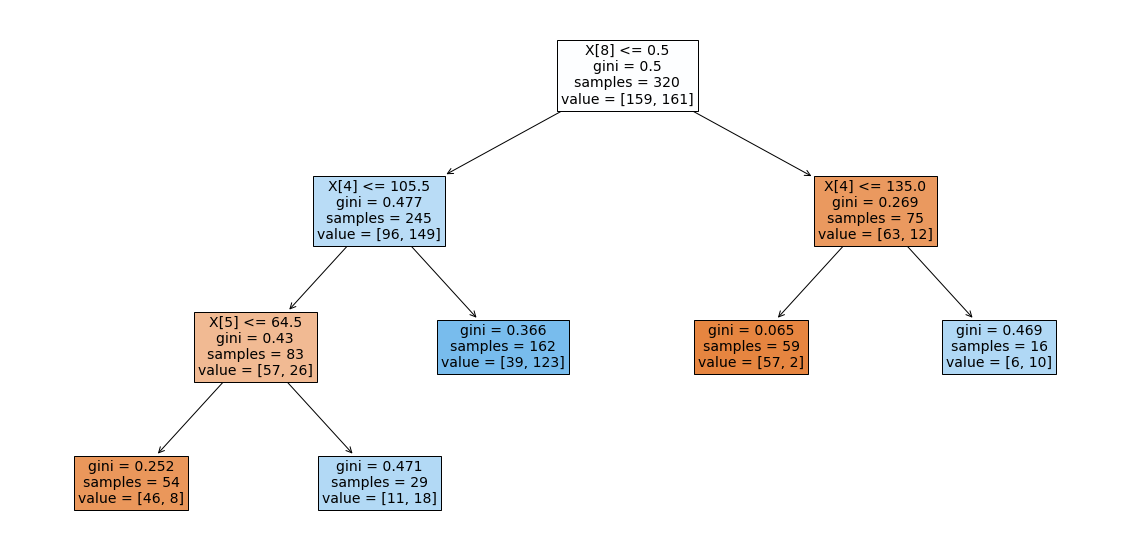

In [159]:
model =DecisionTreeClassifier(max_leaf_nodes=5)
model.fit(new_x_train, new_y_train)
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, fontsize=14)

In [129]:
# univariate feture selection :
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression
# test = SelectKBest(score_func = chi2,k=4)
# fit = test.fit(x,y)
model = LogisticRegression(max_iter=400)
rfe = RFE(model,3)
fit = rfe.fit(x,y)
x.head()

C:\Users\mites\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\mites\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mites\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of i

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [130]:
fit.ranking_
# After feature extraction we can say that ShelveLoc, Urban, Advertising and Price attributes has high impact on Sales. 

array([ 7, 11,  5, 12,  6,  8, 10,  1,  1,  2,  4,  3,  1,  9])

In [160]:
# Ensemble Techniques :
! pip install xgboost

In [161]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [162]:
model = XGBClassifier()
model.fit(new_x_train, new_y_train)
y_pred = model.predict(new_x_test)
accuracy = accuracy_score(y_pred, new_y_test)
accuracy                                # 77.5 % accuracy

C:\Users\mites\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:39:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.775